In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.special import gamma

# Monte Carlo integration

In this notebook, we will use random sampling to perform integration. To start, we will consider the function $$I=\int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right]dx.$$ First lets see what it looks like:

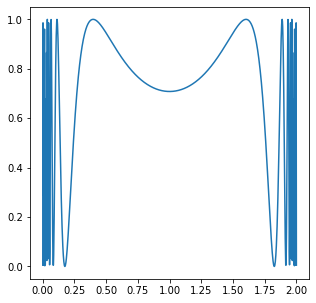

In [2]:
x=np.linspace(1e-6,2-1e-6,1000)

def f(x):
    return np.sin(1./(x*(2-x)))**2

fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f(x))

plt.savefig('mc_int_func.pdf',bbox_inches='tight')
plt.show()

Lets try some built in methods for numerical integration:

In [3]:
quad=integrate.quad(f,0,2)
print('Integral quad:',quad[0],', error:',quad[1])
print('Integral Simpson:',integrate.simps(f(x),x))

Integral quad: 1.4516877509810684 , error: 0.0027123781525915302
Integral Simpson: 1.4476999666322365


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


The error is quite large, and went to the max number of subintervals. Lets try the random sampling strategy discussed in class.

## "Hit or miss" Monte Carlo integration

In [8]:
N=10000
x_rand=2.*np.random.rand(N)
f_x=f(x_rand)
y=np.random.rand(N)

diff=f_x-y

k=len(np.where(diff > 0.)[0])

I=2.*k/N

print('Result of Monte Carlo Integration:',I)

# Uncomment lines below to generate plot

# fig,ax=plt.subplots(figsize=(5,5))
# ax.plot(x,f(x))

# for i in range(N):
    
#     if diff[i]>0: ax.plot(x_rand[i],y[i],'or')
#     if diff[i]<0: ax.plot(x_rand[i],y[i],'ob')
        

#plt.savefig('mc_int.pdf',bbox_inches='tight')
plt.show()

Result of Monte Carlo Integration: 1.4546


## Mean value method method

Now lets try the mean value method discussed in class:

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))

Is=[]
Ns=[]
errs=[]
for N_exp in range(1,8):

    # Number of samples
    N=10**N_exp
    Ns.append(N)
    
    # Generate random samples
    samples=f(2.*np.random.rand(N))
    
    # Error
    err=2.*np.std(samples)/np.sqrt(N)
    errs.append(err)
    
    # Solve the integral
    I=(2./N)*np.sum(samples)
    Is.append(I)
    
    
# Plot
ax.errorbar(Ns,Is,yerr=errs,fmt='x:')
ax.set_xscale('log')
ax.set_xlabel('Number of samples')
ax.set_ylabel('I')

plt.savefig('mc_int_mean_value.pdf',bbox_inches='tight')
plt.show()

## Volume of hypersphere

We will now use the mean value method to calculate the volume of a 10-dimensional hypersphere:
$$f(\textbf{r})=\begin{cases}1 & {\rm if }\; \textbf{r} \leq 1 \\
0 & {\rm otherwise}\end{cases}.$$

We can compare to the exact volume, given by:
$$V_d(r)=\frac{\pi^{d/2}}{\Gamma\left(\frac{d}{2}+1\right)}r^d,$$
where $d$ is the number of dimensions, and $r$ is the radius.

In [ ]:
dim=2
N=10000000

# Generate random coefficients
samples=np.random.rand(N,dim)

# Sum over function 
f_sum=len(np.where(np.sum(samples**2,axis=1) <= 1.)[0])

# Calculate integral
I=(2**dim/N)*f_sum

# Exact equation:
def vol_hypersphere(dim,r):
    return (np.pi**(dim/2)*r**dim)/gamma(dim/2+1)

print('Midpoint method integration volume:',I)
print('Exact volume:',vol_hypersphere(dim,1))
        


## Importance sampling and pathological functions

Consider now the integral:
$$I=\int_0^1\frac{x^{-1/2}}{e^x+1}dx.$$

Lets plot the function:

In [ ]:
x=np.linspace(1e-5,1,1000)

def f(x):
    return (x**(-0.5))/(np.exp(x)+1)

fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f(x))
ax.set_yscale('log')

plt.savefig('mc_int_func_div.pdf',bbox_inches='tight')
plt.show()

We see that it diverges at $x=0$. Now we will use the importance sampling method to solve. We showed in the lecture that we need to sample:
$$I \simeq \frac{1}{N}\sum_{i=1}^N \frac{2}{e^{x_i}+1}$$
where $x_i$ is sampled over the distribution $x=z^2$.

In [ ]:
N=10000
I=(1./N)*np.sum(2./(np.exp(np.random.rand(N)**2)+1))

print('Importance sampling method gives:', I)